In [96]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [97]:
#load datasets
stats = pd.read_csv("datasets/nba_2017_players_stats.csv") 
salary = pd.read_csv("datasets/nba_2017_salary.csv")
#merge data sets based on name, drop na values
df1 = stats.merge(salary, on='NAME')
df2 = df1.dropna(axis=1)
#Features are Age, 3p, 2p, Fg%, MPG, FT%, AST, STL, BLK, Points
df3 = df2[["AGE", "FG%" , "3P", 
           "2P", "TRB", "AST", 
           "STL", "BLK", "POINTS", 
           "MPG"]]

features = ["AGE","FG%" , "3P", "2P", "TRB", "AST", "STL", "BLK", "POINTS", "MPG"]
fAvg = []
fMax = []
fMin = []
fRange = []
for f in features:
    fAvg.append(round(np.mean(df3[f]),2))
for f in features:
    fMax.append(round(np.amax(df3[f]),2))
for f in features:
    fMin.append(round(np.amin(df3[f]),2))
for i in range(len(fMax)):
    fRange.append(fMax[i] - fMin[i])
  

In [98]:
#target vector
y = np.array(df2["SALARY"])
y = y.reshape(y.shape[0],1)
x = df3.values
'''
a=np.ones((y.shape[0],1))
x=np.hstack((a , x))
'''
#transforming features
'''
for j in range(0,10):
    for i in range(0,342):
        x[i][j] = x[i][j] / fMax[j]
'''

#test and training splits
X_tr = x[0:200]
Y_tr = y[0:200]
X_test = x[200:342]
Y_test = y[200:342]
'''
for i in range(0,342):
    x[i] = (x[i] - fAvg[j])/fRange[j]
'''



'\nfor i in range(0,342):\n    x[i] = (x[i] - fAvg[j])/fRange[j]\n'

In [99]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,Y_tr)
predict = regr.predict(X_test) 
test_error = np.sum(np.square(Y_test - predict)) / (2 * Y_test.shape[0]) 
print(test_error)

9.67595976329e+12


In [100]:
model = linear_model.Lasso(warm_start=True, fit_intercept = True )
nalpha = 100000 # Number of alpha values we try to use to fit the model
alphas = np.logspace(-2,2,nalpha) # 100 log spaced valued between 10^-3 to 10^2. 

In [101]:
test_errors = []  # To store values of test errors for different alphas.
for i in range(100000):
    model.alpha = alphas[i]
    model.fit(X_tr,Y_tr)
    pred = model.predict(X_test)
    test_err = np.sum(np.square(Y_test - pred)) / (Y_test.shape[0])
    test_errors.append(test_err)
    if(i==99999):
        coeff = model.coef_
        intercept = model.intercept_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([  595963.69215401, -1749524.05259402, -1380701.71549753,
        -829834.78584923,   594508.2446043 ,  -130367.82937069,
        1005996.55303999,  -536201.26587866,   868050.43753395,
         -39409.30071071])

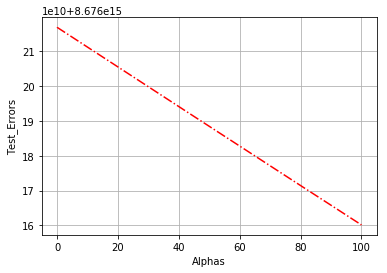

In [102]:
plt.plot(alphas,test_errors,'-.',color='r')
plt.xlabel('Alphas')
plt.ylabel('Test_Errors')
plt.grid()

coeff

In [103]:
a=np.ones((y.shape[0],1))
x=np.hstack((a,x))
beta = np.insert(coeff,0,intercept)

In [104]:

def predict(x,beta):
    yhat = np.dot(x,beta)
    return yhat
yhat = predict(x,beta)

In [105]:
#round values in predicted vectors
yhat = np.around(yhat,decimals=-3)

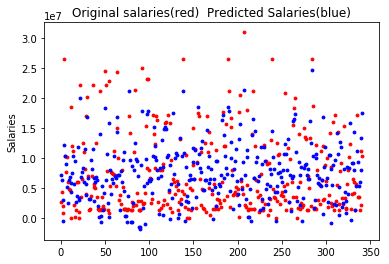

In [106]:
#plot predicted values and y to see simiarities
x = np.arange(0,y.shape[0])
plt.scatter(x,y,color ='red',s=8)
#plt.scatter(y,yhat,color ='blue',s=8)
plt.scatter(x,yhat, color='blue',s=8)
plt.ylabel("Salaries")
plt.xlabel("")
plt.title("Original salaries(red)  Predicted Salaries(blue)")
plt.show()

In [107]:
#Calculating R^2
def calculateR2(y,yhat):
    ym = np.mean(y)
    rss = np.sum((y-yhat)**2)
    ess = np.sum((yhat-ym)**2)
    tss = np.sum((y-ym)**2)
    return ess/tss #R^2

rsq1 = calculateR2(y,yhat)
print(rsq1) 

0.554261944609


In [77]:
#Min and max values for predicted set
yhatmax = np.amax(yhat) #25264000
yhatmin = np.amin(yhat) #-1231000
print(yhatmax,yhatmin)

24701000.0 -1710000.0
